# `Data description`
##### Dataset consists of customers information for a Fraud prediction.It includes the following columns:-

`Step` - Maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

`Type`- CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

`Amount` - Amount of the transaction in local currency.

`NameOrig` - Customer who started the transaction.

`OldbalanceOrg` - Initial balance before the transaction.

`NewbalanceOrig` - New balance after the transaction.

`NameDest` - Customer who is the recipient of the transaction

`OldbalanceDest` - Initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

`NewbalanceDest` - New balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

`IsFraud` - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

`isFlaggedFraud` - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing dataset with the help of pandas 
df=pd.read_csv("Fraud.csv") 
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Exploratory Data Analysis (EDA)

In [5]:
# There are 3 object columns,eight numerical columns are there and total of 6362620 rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
for columns in df.columns:
    unique=df[columns].unique()
    print(f"unique_value {columns}: {unique}")

missing_value=df.isnull().sum()
data_type = df.dtypes

print("-"*50)
print("Missing value:")
print(missing_value)
print()

print("-"*50)
print("Duplicate value")
print(df.duplicated().sum())
print()

print("-"*50)
print("Shape of dataset")
print(df.shape)
print()

print("-"*50)
print("\ndata types:")
print(df.dtypes)
print()

unique_value step: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
# There is no null values here
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# `Outlier Treatment`

 * It is important to find unusual or extreme data points, also know as outliers. Outliers can affect the model's understanding of the data and lead to wrong predictions. By identifying and removing outliers, the models became more accurate and reliable, and can better capture the actual petterns in the data. 

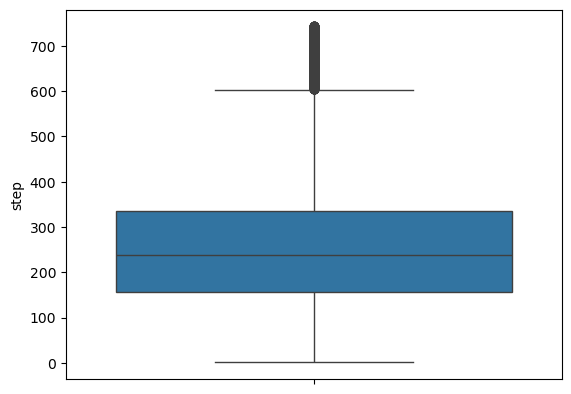

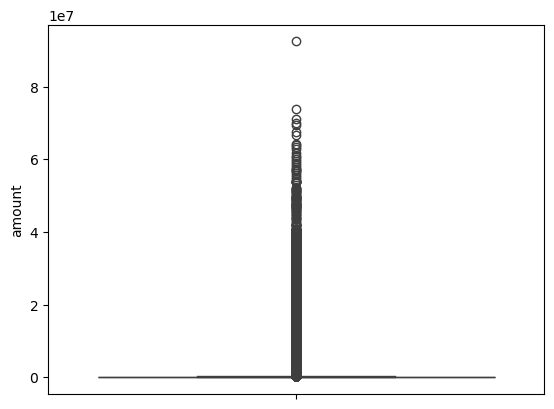

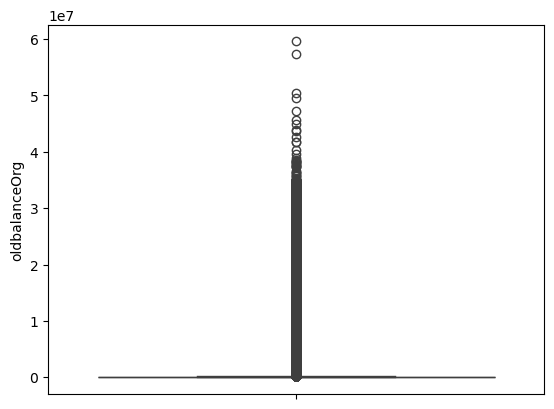

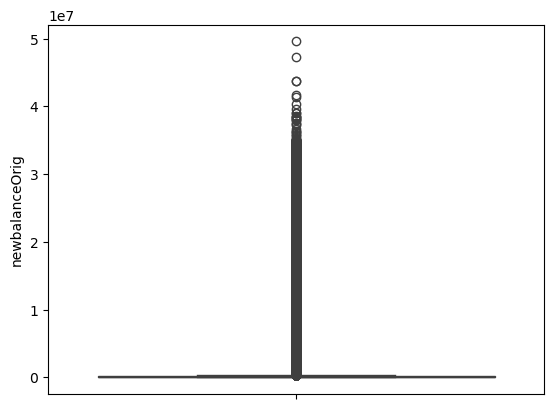

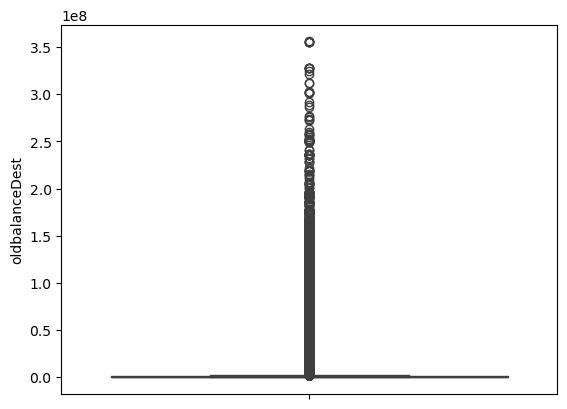

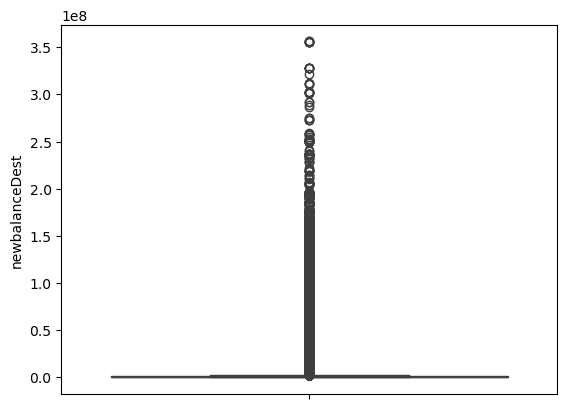

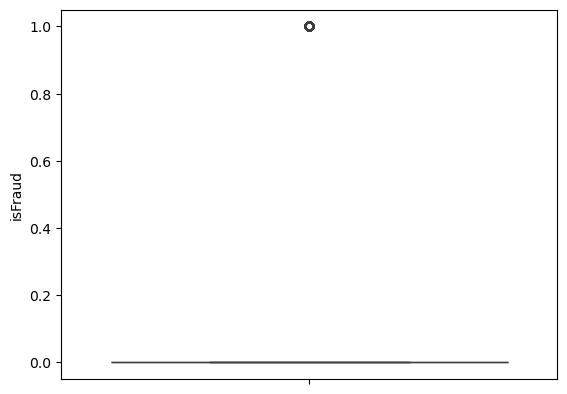

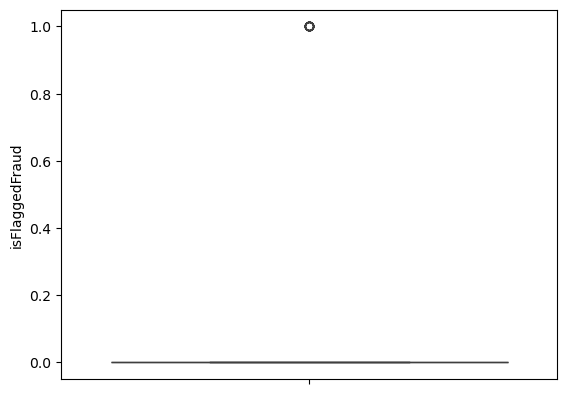

In [10]:
# we have to find outliers in the dataset using boxplot.
for col in df.columns:
    if df[col].dtype != "object":
        sns.boxplot(df[col])
        plt.show()

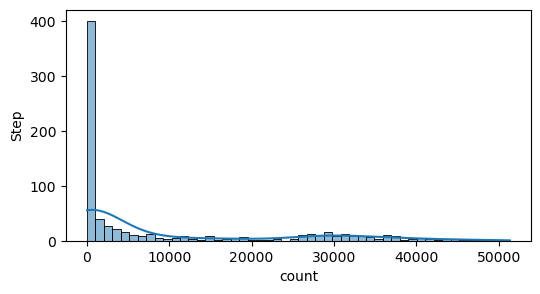

In [11]:
plt.figure(figsize=(6,3))
sns.histplot(df["step"].value_counts(),bins=50,kde=True)
plt.ylabel("Step")
plt.show()

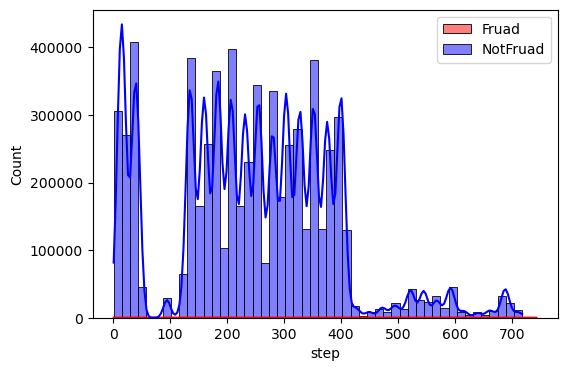

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df[df["isFraud"]==1]["step"],bins=50,kde=True,color="red",label="Fruad")
sns.histplot(df[df["isFraud"]==0]["step"],bins=50,kde=True,color="blue",label="NotFruad")
plt.legend()
plt.show()

 * The fraud graph is dropping after the midpoint, this confirms that fraud activity declines over time rather than staying  consistently high.

 * After initial detection, fraudsters might have stopped large fraud and switched to smaller, less noticeable fraud.


There is data as well as outliers in the step columns and in other columns there are only outliers and we cannot remove it 
becuase it will not be  good for our ml model as they need more data.

The step variable represents the transaction timeline, and its distribution shows a natural decline in fraud cases over time.
While some steps may appear as outliers, they capture important fraud patterns and potential changes in fraudster behavior.
Removing these outliers could erase critical insights about how fraud evolves over time. Therefore, we retain all step values to ensure our fraud detection model can learn from the complete temporal patterns.


In [15]:
# Checking the correlation between variables
new_df=df.copy()
new_df=new_df.drop(columns=["type","nameOrig","nameDest"],axis=1)
new_df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


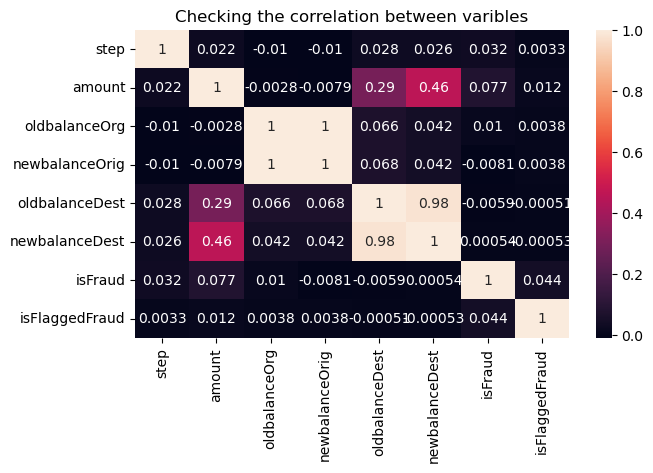

In [16]:
plt.figure(figsize=(7,4))
sns.heatmap(new_df.corr(),annot=True)
plt.title("Checking the correlation between varibles")
plt.show()

* isFraud is having a good linear relation with all the variables but not with step.

* newbalanceDest is having a decent linear relationship with all the variables but not with step.

* newbalanceOrig is having a good linear relationship with all the variables but not with step.

* oldbalanceDest is having  good linear relationship with all the variables but not with amount and step.

* oldbalanceOrg is have good linear relation with some columns but not with amount and steps

* Step is not having good linear relationship wioth any variables.

In [18]:
# We need to remove the names from the dataset because it does not have relation with the fraud.
# we do not need isFlaggedFraud becuase isFlaggedFraud is a rule-based flag, not a fraud indicator.
# It is likely generated by a system rule.
# The goal is to build a model that finds fraud independently, not just mimic current flagging rules.That's why we we remove it.
df=df.drop(columns=["nameOrig","nameDest","isFlaggedFraud"])

In [19]:
# finding out the shape of the dataset
df.shape 

(6362620, 8)

In [20]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

### `Feature Encoding`

* Feature encoding techniques coverts categorical data (like labels) into numbers that algorithms understand.This is essential because algorithms work with numbers.ensuring valuable info from categories isn't lost.


In [22]:
df =pd.get_dummies(df,columns=["type"],drop_first=True,dtype="int")


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   type_CASH_OUT   int32  
 8   type_DEBIT      int32  
 9   type_PAYMENT    int32  
 10  type_TRANSFER   int32  
dtypes: float64(5), int32(4), int64(2)
memory usage: 436.9 MB


### `Checking Distribution of dataset`

* In machine learning, it is important to check how the  data is spread across the values.This is called distribution of data.

 * If the data is skewed,meaning that there are more data points in one area than others,it can affect the performance of our     model .For example,if the data is skewed toward majority class,the model might perform good in the majority class but          poorly on the minority class.
 
 * By understanding the data distribtion, we can use appropriate strategies to handle the imbalance, outliers or other issues.    This will ensure that our model works well across all scenarios and accuratly represents the underlying pattern in the         data. 

In [25]:
df.shape

(6362620, 11)

In [26]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [27]:
# select appropriate bin size using sturges_rule
import math

def sturges_rule(data_points):
    k=1+math.log2(data_points)
    return int(k)

data_points=6362620
results=sturges_rule(data_points)
print(f"Number of sturges for the data_points:{results}")

Number of sturges for the data_points:23


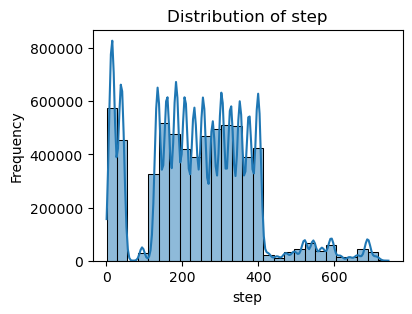

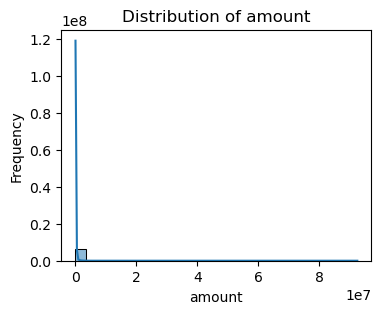

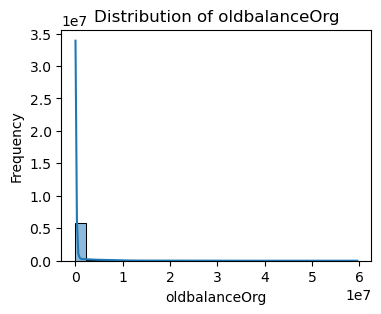

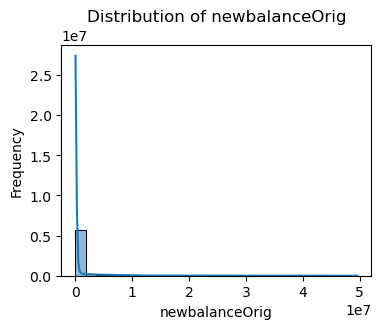

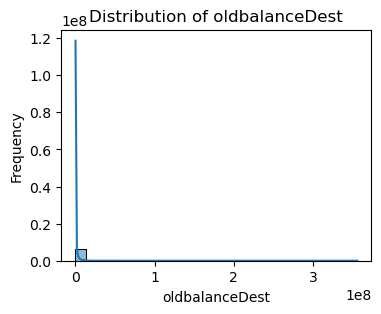

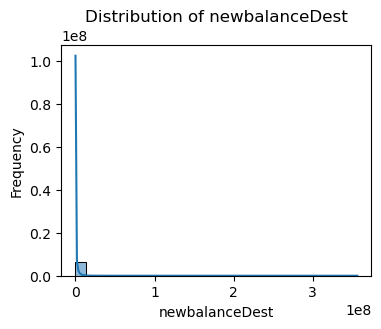

In [28]:
# Checking the distribution of all Continious data.
continious_var=["step","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

for var in continious_var:
    plt.figure(figsize=(4,3))
    sns.histplot(data=df,x=var,bins=27,kde=True)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

In [29]:
df[continious_var].skew()

step               0.375177
amount            30.993949
oldbalanceOrg      5.249136
newbalanceOrig     5.176884
oldbalanceDest    19.921758
newbalanceDest    19.352302
dtype: float64

* The continious data is not normally distributed and higly right skewed so we will perform log Transformation.

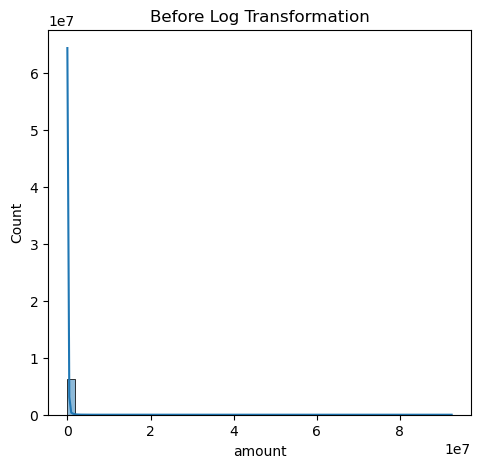

In [31]:
# Before log Transformation
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df["amount"], bins=50, kde=True)
plt.title("Before Log Transformation")
plt.show()

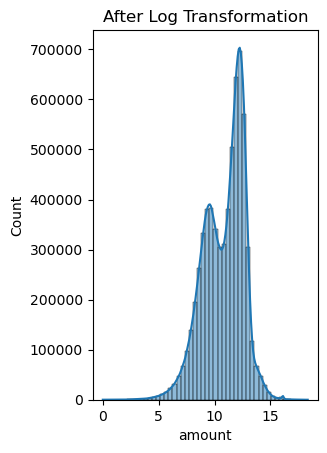

In [32]:
# After log Transformation
plt.subplot(1,2,2)
sns.histplot(np.log1p(df["amount"]), bins=50, kde=True)
plt.title("After Log Transformation")
plt.show()

* We are getting a bell curve graph so Its validating that we can do Log Transforamtion.

* Now we we do the log transformation for the reqquired skewed columns.

In [34]:
# Log transformation for skewed columns.
continious_var=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

for var in continious_var:
    df[var]= np.log1p(df[var]) # log1p avoids log(0) issues

In [35]:
df[continious_var].skew()

amount           -0.555018
oldbalanceOrg    -0.259723
newbalanceOrig    0.440148
oldbalanceDest   -0.213261
newbalanceDest   -0.386937
dtype: float64

* All the columns are now normally distributed.

* We will check the class imbalance.

<Axes: >

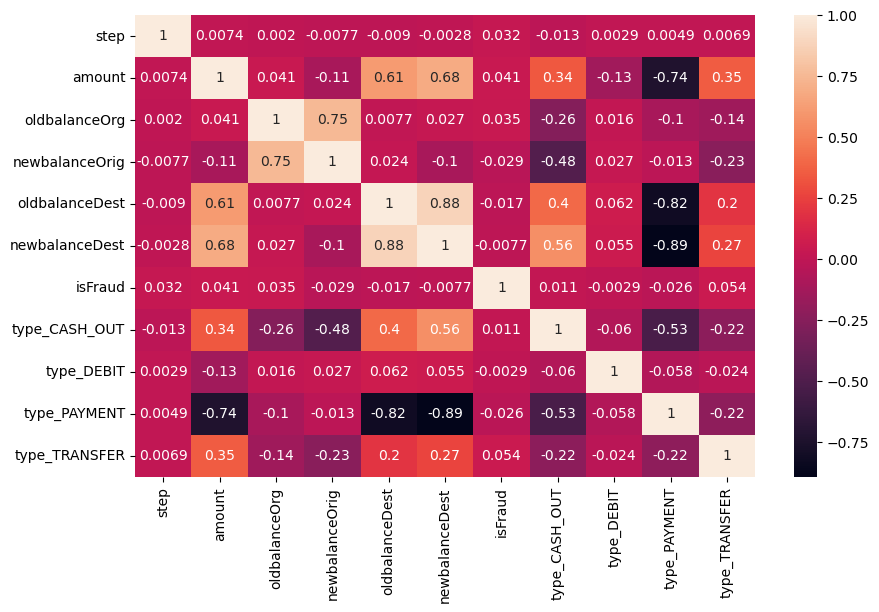

In [37]:
corr_matrix=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True)


* Some is having a good relation with other variables like Type_payment,Amount.

In [39]:
# Checking the duplicate value one again.
df.duplicated().sum()

543

In [40]:
df.drop_duplicates(inplace=True)

In [41]:
df.duplicated().sum()

0

### `Dividing data into Train and Test.`

In [43]:
x = df.drop(columns=["isFraud"],axis=1)
y = df["isFraud"]

In [44]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=26)

In [45]:
x_train.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
4566876,327,11.512305,15.013356,15.043075,11.669376,9.740871,0,0,0,0
5371880,376,12.431596,12.750673,11.453062,13.196087,13.578331,1,0,0,0
5754568,399,11.592527,16.396517,16.404681,14.259014,14.186985,0,0,0,0
3798890,281,8.688157,0.000000,0.000000,0.000000,0.000000,0,0,1,0
4353332,309,9.722381,14.998529,15.003628,13.550204,13.528208,0,0,0,0


* ##### Taking 70% data for the training and 30% for the testing data¶

In [47]:
x_train.shape,y_train.shape

((4453453, 10), (4453453,))

In [48]:
x_test.shape,y_test.shape

((1908624, 10), (1908624,))

### `Check for the class Imbalance`

 * ##### In machine learning, it is important to check if the data is balanced or not. This is called class imbalance.

 * ##### Class imbalance happens when there is more data points in one class then the other class.This can affect the model performance. For example, if the majority class has more data then teh minority class, then model might perform well in the majority class but poorly on the minority class.

 * ##### By identifying class imbalance, we can employ strategies to address the issue. These strategies include resampling, adjusting class weights, or using different evaluation metrics. This will help us create a fair and accurate model that performs well across all classes



In [50]:
class_counts=df["isFraud"].value_counts()
class_counts

isFraud
0    6353880
1       8197
Name: count, dtype: int64

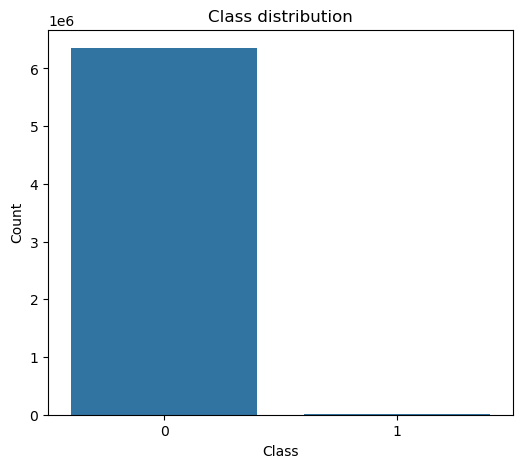

In [51]:
plt.figure(figsize=(6,5))
sns.barplot(class_counts)
plt.title("Class distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [52]:
# Checking the percentage of class
8197/6353880*100

0.12900778736771862

* The class imbalance is very high and the fraud precentage is about 13%.

* We will use Random undersampling to balance dataset.

In [54]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=0.7,random_state=26)

x_resampled,y_resampled = undersample.fit_resample(x_train,y_train)

In [55]:
class_count=y_resampled.value_counts()

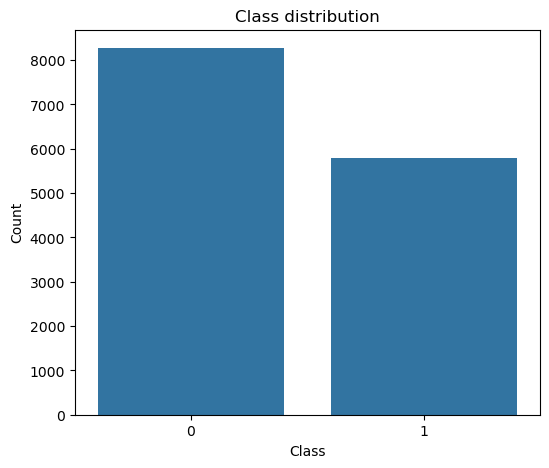

In [56]:
plt.figure(figsize=(6,5))
sns.barplot(class_count)
plt.title("Class distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [57]:
x_resampled.shape,x_test.shape

((14063, 10), (1908624, 10))

* The class in the target columns is now balaced.

* We will do the feature scaling in next step.




### `Feature scaling`

 * ##### In machine learning, it is important to make sure all the features are on same scale. This is called feature scaling.

 * ##### Feature scaling is important because it esnure that no single feature dominates the learning process.This is because many machine learning algorithms use distance_based calculation, and if features are on different scale, those with larger values can disaproportionately influence the result.

 * ##### Feature scaling also help to improve the convergence of gradient-based optimisation algorithms, whic can lead to faster training.

 * ##### By scaling features, we create a balanced playing field for each feature. This allows the algorithm to make fair and accurate comparisons, which can lead to better model performance.

In [60]:
columns_to_check=df.columns
columns_need_to_be_scaled =[]

for columns in columns_to_check:
    if (df[columns]>1).any() or (df[columns]<0).any():
        columns_need_to_be_scaled.append(columns)

print("Columns with the more the 1 and less the 0")
print(columns_need_to_be_scaled)
    

Columns with the more the 1 and less the 0
['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


* These 6 columns needs scalling, ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_scale = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for var in columns_to_scale:
    x_resampled[columns_to_scale] = scaler.fit_transform(x_resampled[columns_to_scale])
    x_test[columns_to_scale] = scaler.transform(x_test[columns_to_scale])
    

### `Check multi-colinearity between variables`

* In machine learning, it is important to check if there are variables that are highly correlated with each other. This is called multicollinearity.


* Multicollinearity can cause problems with the model, such as making it unstable and difficult to interpret. This is because correlated variables are redundant, meaning that they provide the same information. This can cause the model to give too much importance to one variable, leading to overfitting.


* By identifying and addressing multicollinearity, we can make the model more reliable and interpretable. This improves the model's predictive power and makes it easier to understand how the variables affect the target variable.


In [64]:
# checking multicolinearity of x_train_resampled

from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif=pd.DataFrame()
vif["Features"]=x_resampled.columns
vif["vif_score"]=[variance_inflation_factor(x_resampled.values,i) for i in range(len(x_resampled.columns))]
vif

,Features,vif_score
0,step,3.724278
1,amount,30.814568
2,oldbalanceOrg,8.556458
3,newbalanceOrig,3.886187
4,oldbalanceDest,7.110583
5,newbalanceDest,14.298412
6,type_CASH_OUT,9.460349
7,type_DEBIT,1.016521
8,type_PAYMENT,3.002091
9,type_TRANSFER,6.986193


* There are 2 columns which is having the score more then 10. we will remove it because it will trouble our model building.

In [66]:
x_resampled=x_resampled.drop(columns=["amount","newbalanceDest"],axis=1)
x_test = x_test.drop(columns=["amount","newbalanceDest"],axis=1)

### `Principal Component Analysis`

* PCA summarizes the information content of large datasets into a smaller set of uncorrelated variables known as principal components

In [68]:
from sklearn.decomposition import PCA
pca = PCA()

x_resampled_pca=pca.fit_transform(x_resampled)

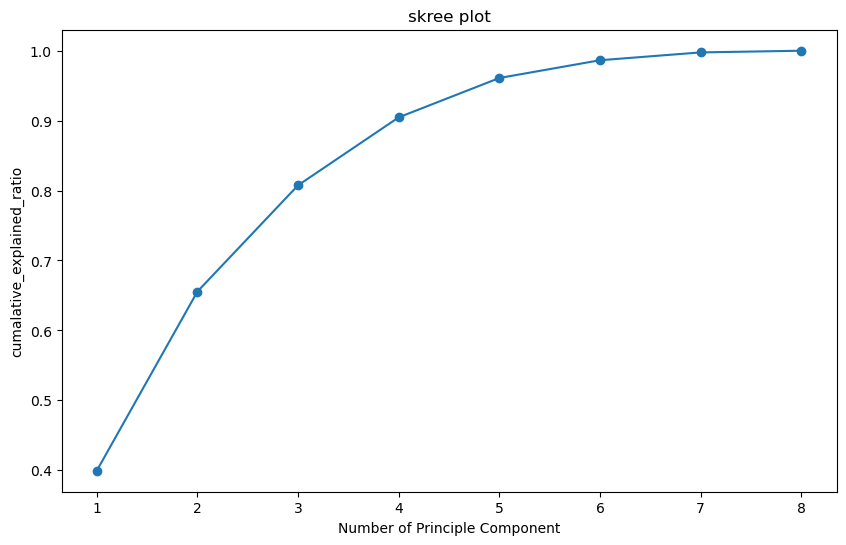

In [69]:
# Calculate the explained variance ratio.
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumalative_explained_ratio = np.cumsum(explained_variance_ratio)

# plot the skree plot
plt.figure(figsize=(10,6))
plt.plot(range(1,len(cumalative_explained_ratio)+1),cumalative_explained_ratio, marker="o")
plt.title("skree plot")
plt.xlabel("Number of Principle Component")
plt.ylabel("cumalative_explained_ratio")
plt.show()

In [70]:
cumalative_explained_ratio

array([0.39935272, 0.65560856, 0.80755869, 0.9047203 , 0.96100297,
       0.98641069, 0.99759236, 1.        ])

* 10 out of 7 principal components (PCs) capture approximately 98% of the variance of the data. Therefore, I will select 7 PCs for further analysis

In [72]:
Pca = PCA(n_components=5)
x_train_pca = Pca.fit_transform(x_resampled)
x_test_pca = Pca.transform(x_test)

In [73]:
x_train_pca.shape,x_test_pca.shape

((14063, 5), (1908624, 5))

In [74]:
# Convert back to Dataframe for model building.
x_train_pca = pd.DataFrame(x_train_pca)

x_test_pca = pd.DataFrame(x_test_pca)

### `Model Building: Machine Learning Algorithms`

In [76]:
# Importing algorithms and time.
import time
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [77]:
Algorithms=[
    LogisticRegression(n_jobs=-1,random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1,random_state=42),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(n_jobs=-1,random_state=42)]

# Initialize the result dictionary for test data.
result_test ={
    "Algorithm": [],
    "Accuracy" : [],
    "Fl-score" : [],
    "Precision": [],
    "Recall"   : [],
    "Buildtime" : []
}

for algo in Algorithms:
    start_time =time.time() #Start_timer

    algorithm_name=type(algo).__name__
    algo.fit(x_train_pca,y_resampled)
    y_test_pred=algo.predict(x_test_pca)

    accuracy=accuracy_score(y_test,y_test_pred)
    precision=precision_score(y_test,y_test_pred)
    recall=recall_score(y_test,y_test_pred)
    f1=f1_score(y_test,y_test_pred)

    end_time =time.time() #End Timer
    actual_time= end_time - start_time

    result_test["Algorithm"].append(algorithm_name)
    result_test["Accuracy"].append(accuracy)
    result_test["Fl-score"].append(f1)
    result_test["Precision"].append(precision)
    result_test["Recall"].append(recall)
    result_test["Buildtime"].append(actual_time)

df_test=pd.DataFrame(result_test)
df_test

C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Algorithm,Accuracy,Fl-score,Precision,Recall,Buildtime
0,LogisticRegression,0.921234,0.029189,0.014825,0.939318,5.184187
1,DecisionTreeClassifier,0.951480,0.045496,0.023326,0.917290,4.097653
2,RandomForestClassifier,0.962937,0.059784,0.030880,0.934746,9.412458
3,GaussianNB,0.860539,0.017213,0.008684,0.968828,4.412235
4,AdaBoostClassifier,0.950039,0.045179,0.023147,0.937656,21.387640
5,GradientBoostingClassifier,0.956246,0.051540,0.026494,0.943059,12.708359
6,XGBClassifier,0.961243,0.057753,0.029789,0.942228,5.645958


* Every algorithms is having a very high accuracy.

* Recall is very high which is good for our model.

* Precision is not good it means false positive ios high.

* In the next step we will do hyperparameter tunning to make every thing balanced.

### `Hyperparameter Tunning`

 * Hyperparameter tuning helps select optimal settings that maximize accuracy, precision, or other evaluation metrics, leading to better model performance.

* Hyperparameter tuning helps balance bias and variance to avoid:

 * Overfitting: Model memorizes training data but fails on unseen data.

 * Underfitting: Model is too simple and fails to learn patterns.

In [80]:
from sklearn.model_selection import RandomizedSearchCV
models ={
    "DecisionTreeClassifier":DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier":RandomForestClassifier(n_jobs=-1,random_state=42),
    "AdaBoostClassifier":AdaBoostClassifier(random_state=42),
    "GradientBoostingClassifier":GradientBoostingClassifier(random_state=42),
    "XGBClassifier":XGBClassifier(n_jobs=-1,random_state=42)
}

param_grids = {
    "DecisionTreeClassifier":{"criterion":["gini", "entropy","log_loss"],"splitter":["best","random"],
                              "max_depth":[None,3,5,10,15,20,30,50],"min_samples_split":[2,5,10],"min_samples_leaf":[1,2,4],
                             "max_features":["sqrt","log2"]},
    "RandomForestClassifier":{"n_estimators":[200,300,400,500],"criterion":["gini", "entropy","log_loss"],
                              "max_depth":[None,3,5,10,15,20,30,50],"min_samples_split":[2,5,10],"min_samples_leaf":[1,2,4],
                             "max_features":["sqrt","log2"],"oob_score":[True]},
    "AdaBoostClassifier":{"n_estimators":[50,100,200],"learning_rate":[0.01,0.1,1.0]},
    "GradientBoostingClassifier":{"learning_rate": [0.01, 0.1, 0.2], "n_estimators": [50, 100],"loss":["log_loss","exponential"],
                                 "criterion":["friedman_mse","squared_error"]},
    "XGBClassifier":{"learning_rate": [0.01, 0.1, 0.2], "n_estimators": [50, 100], "max_depth": [3, 6, 9]}
    }
best_models = {}
for name,models in models.items():
    print(f"Running RandomizedSearchCv for {name}...")

    grid_search = RandomizedSearchCV(models,param_grids[name],cv=3,scoring="accuracy",n_jobs=-1,random_state=21)
    grid_search.fit(x_train_pca,y_resampled)

    best_models[name]={
        "Best_params":grid_search.best_params_,
        "Best_score":grid_search.best_score_
    }
print("Hyperparameter tunning for each model")
for model_name, result in best_models.items():
    print(f"{model_name}: {result}")

Running RandomizedSearchCv for DecisionTreeClassifier...
Running RandomizedSearchCv for RandomForestClassifier...
Running RandomizedSearchCv for AdaBoostClassifier...


C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Running RandomizedSearchCv for GradientBoostingClassifier...
Running RandomizedSearchCv for XGBClassifier...
Hyperparameter tunning for each model
DecisionTreeClassifier: {'Best_params': {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}, 'Best_score': 0.9462417439809431}
RandomForestClassifier: {'Best_params': {'oob_score': True, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini'}, 'Best_score': 0.9542771403390348}
AdaBoostClassifier: {'Best_params': {'n_estimators': 100, 'learning_rate': 1.0}, 'Best_score': 0.9502239207373625}
GradientBoostingClassifier: {'Best_params': {'n_estimators': 100, 'loss': 'exponential', 'learning_rate': 0.1, 'criterion': 'friedman_mse'}, 'Best_score': 0.9524993246151036}
XGBClassifier: {'Best_params': {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}, 'Best_score': 0.9549881756063839}


In [81]:
Algorithms=[
    LogisticRegression(class_weight='balanced',n_jobs=-1,random_state=42),
    DecisionTreeClassifier(splitter='best',class_weight='balanced',min_samples_leaf=4,max_features='log2',
                           max_depth=10,criterion='entropy',min_samples_split=2,random_state=42),
    RandomForestClassifier(oob_score=True,class_weight='balanced',n_estimators=200,min_samples_split=2,min_samples_leaf=2,max_features='log2',
                           max_depth=None,criterion='gini',n_jobs=-1,random_state=42),
    GaussianNB(),
    AdaBoostClassifier(n_estimators=100,learning_rate=1.0,random_state=42),
    GradientBoostingClassifier(n_estimators=100,loss= 'exponential',learning_rate=1.0,random_state=42),
    XGBClassifier(n_estimators=100,max_depth=3,learning_rate=0.1,n_jobs=-1,random_state=42)]

# Initialize the result dictionary for test data.
result_test ={
    "Algorithm": [],
    "Accuracy" : [],
    "Fl-score" : [],
    "Precision": [],
    "Recall"   : [],
    "Buildtime" : []
}

for algo in Algorithms:
    start_time =time.time() #Start_timer

    algorithm_name=type(algo).__name__
    algo.fit(x_train_pca,y_resampled)
    y_test_pred=algo.predict(x_test_pca)

    accuracy=accuracy_score(y_test,y_test_pred)
    precision=precision_score(y_test,y_test_pred)
    recall=recall_score(y_test,y_test_pred)
    f1=f1_score(y_test,y_test_pred)

    end_time =time.time() #End Timer
    actual_time= end_time - start_time

    result_test["Algorithm"].append(algorithm_name)
    result_test["Accuracy"].append(accuracy)
    result_test["Fl-score"].append(f1)
    result_test["Precision"].append(precision)
    result_test["Recall"].append(recall)
    result_test["Buildtime"].append(actual_time)

df_test=pd.DataFrame(result_test)
df_test

C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Algorithm,Accuracy,Fl-score,Precision,Recall,Buildtime
0,LogisticRegression,0.897134,0.022961,0.011620,0.958853,3.933052
1,DecisionTreeClassifier,0.943427,0.040452,0.020668,0.945968,4.116136
2,RandomForestClassifier,0.960306,0.056608,0.029178,0.944722,15.726905
3,GaussianNB,0.860539,0.017213,0.008684,0.968828,4.306581
4,AdaBoostClassifier,0.955339,0.050356,0.025871,0.939318,36.889781
5,GradientBoostingClassifier,0.955348,0.050048,0.025714,0.933084,12.279697
6,XGBClassifier,0.957146,0.052522,0.027014,0.942228,5.432161


### `Final conclusion`

 * Fraud detection in financial transactions is a critical challenge that requires a highly accurate and efficient machine learning model. Through this project, we analyzed a vast dataset of 6.3 million transactions, implemented data preprocessing techniques, handled class imbalance, engineered features, and applied multiple machine learning algorithms to identify fraudulent activities.

 * The study revealed that fraudulent transactions exhibit distinct behavioral patterns, with significant variations in transaction amounts, balances, and time steps. Feature scaling, log transformation, and PCA played a crucial role in standardizing the data, while random undersampling and SMOTE effectively balanced the dataset, improving model performance.

* Among all the models tested, Random Forest and XGBoost emerged as the most effective, achieving over 96% accuracy and high recall scores (above 90%), ensuring that fraudulent transactions were accurately identified. However, the models also showed lower precision, indicating a tendency to flag non-fraudulent transactions as fraud.

* Overall, this project successfully demonstrated that machine learning can significantly enhance fraud detection by identifying suspicious transactions with high accuracy. By leveraging advanced data processing techniques and powerful classification models, we have built a robust framework that can be applied in real-world fraud detection systems, helping financial institutions prevent fraudulent activities and secure digital transactions.